In [48]:
import numpy as np
from pykalman import KalmanFilter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import wget

In [ ]:
#!pip install pykalman
#!pip install tensorflow
#!pip install matplotlib
#!pip install scipy

In [3]:
# Generate sample data
np.random.seed(0)
n_samples = 100
true_values = np.sin(np.linspace(0, 2 * np.pi, n_samples)) + np.random.normal(0, 0.1, n_samples)


In [4]:
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kf = kf.em(true_values, n_iter=5)
(filtered_state_means, _) = kf.filter(true_values)

In [5]:
X = filtered_state_means[:-1]  # Use filtered states as features (except the last one)
y = true_values[1:]  # Predict the next value

In [6]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))  # Input layer
model.add(Dense(1))  # Output layer

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=1, verbose=0)

In [7]:
# Predict using the trained model
predicted_values = model.predict(X)

4/4 [==============================] - 0s 1ms/step


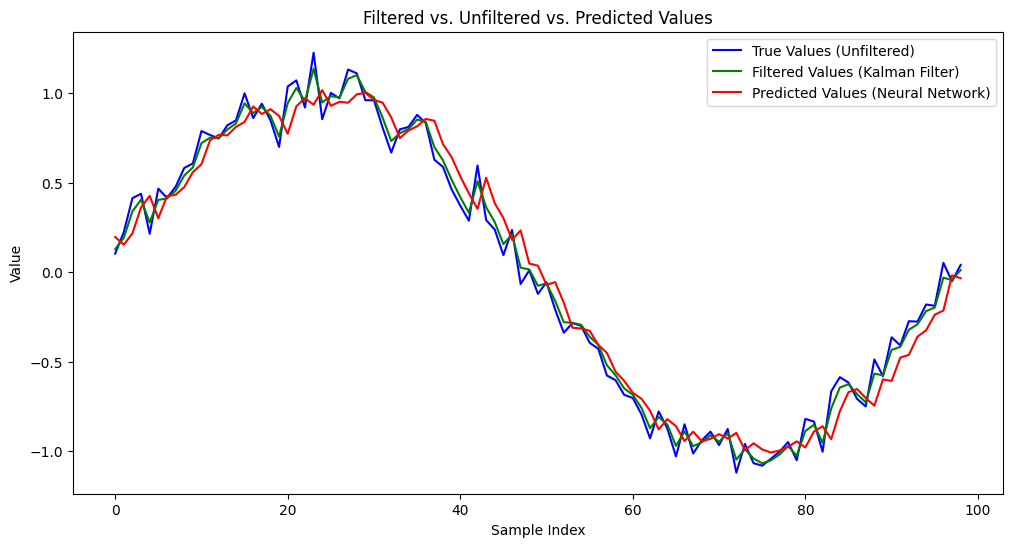

In [8]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(true_values[1:], label='True Values (Unfiltered)', color='blue')
plt.plot(filtered_state_means[1:], label='Filtered Values (Kalman Filter)', color='green')
plt.plot(predicted_values, label='Predicted Values (Neural Network)', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Filtered vs. Unfiltered vs. Predicted Values')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step


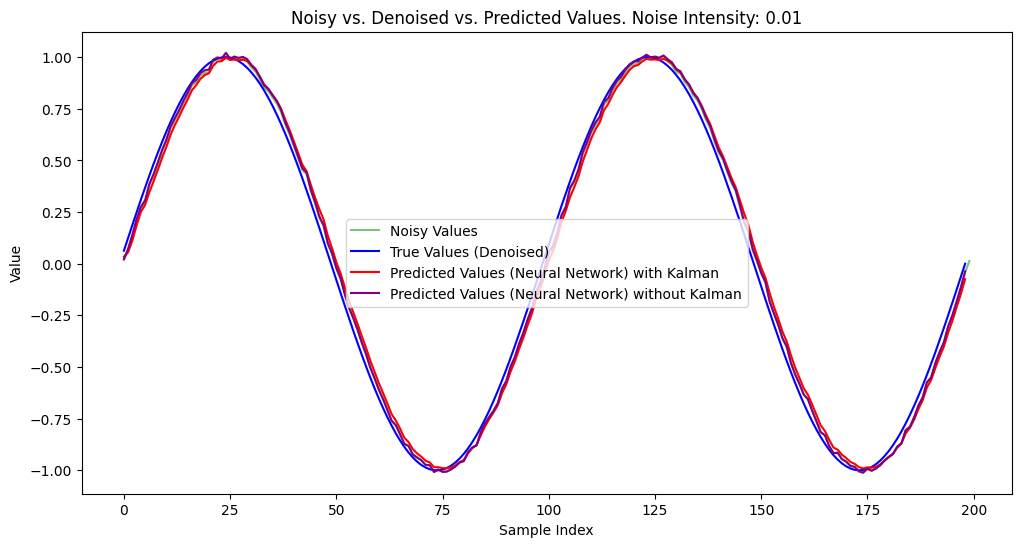

MAE (Predicted with Kalman): 0.0405
MSE (Predicted with Kalman): 0.0021
MAE (Predicted without Kalman): 0.0414
MSE (Predicted without Kalman): 0.0022
7/7 [==============================] - 0s 1ms/step


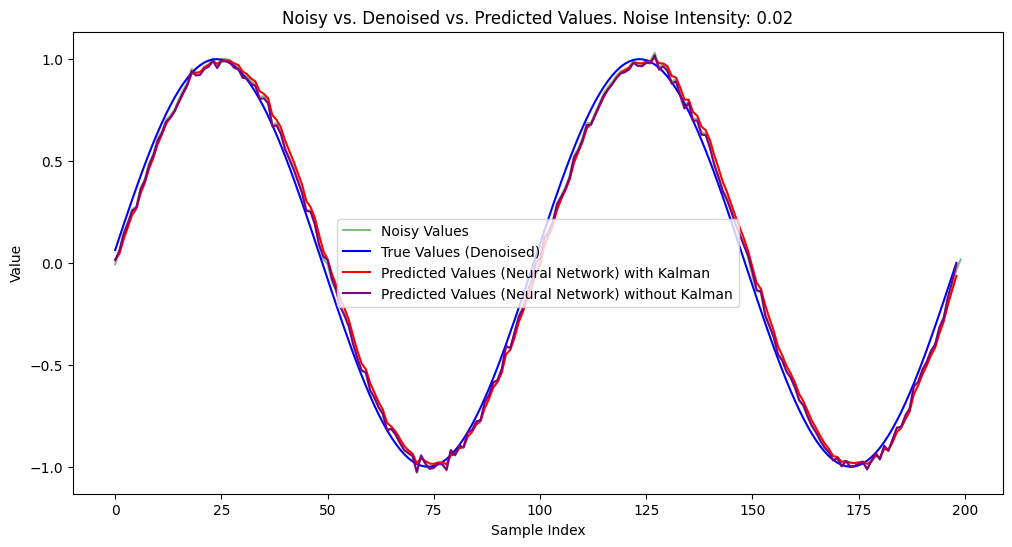

MAE (Predicted with Kalman): 0.0415
MSE (Predicted with Kalman): 0.0022
MAE (Predicted without Kalman): 0.0458
MSE (Predicted without Kalman): 0.0028
7/7 [==============================] - 0s 1ms/step


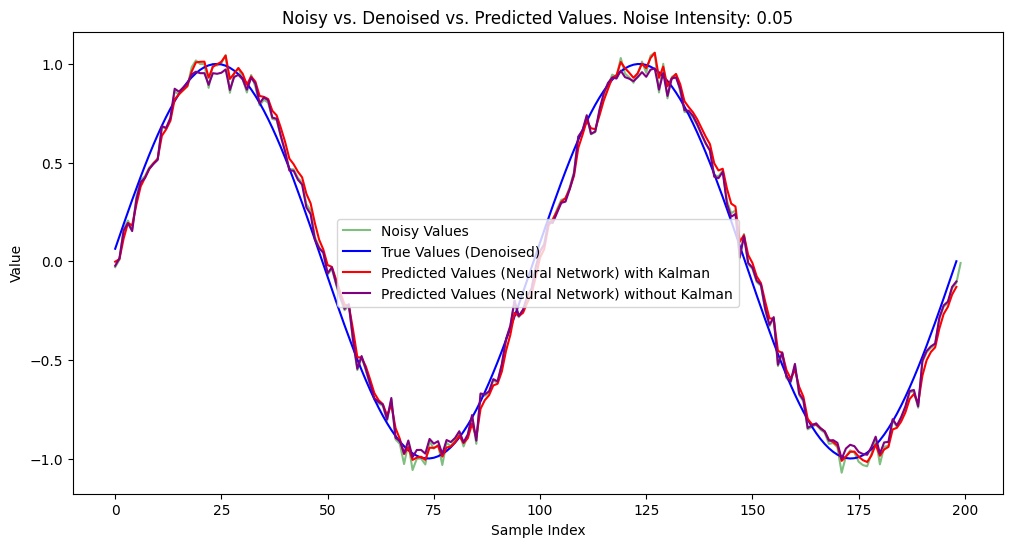

MAE (Predicted with Kalman): 0.0511
MSE (Predicted with Kalman): 0.0039
MAE (Predicted without Kalman): 0.0667
MSE (Predicted without Kalman): 0.0070
7/7 [==============================] - 0s 1ms/step


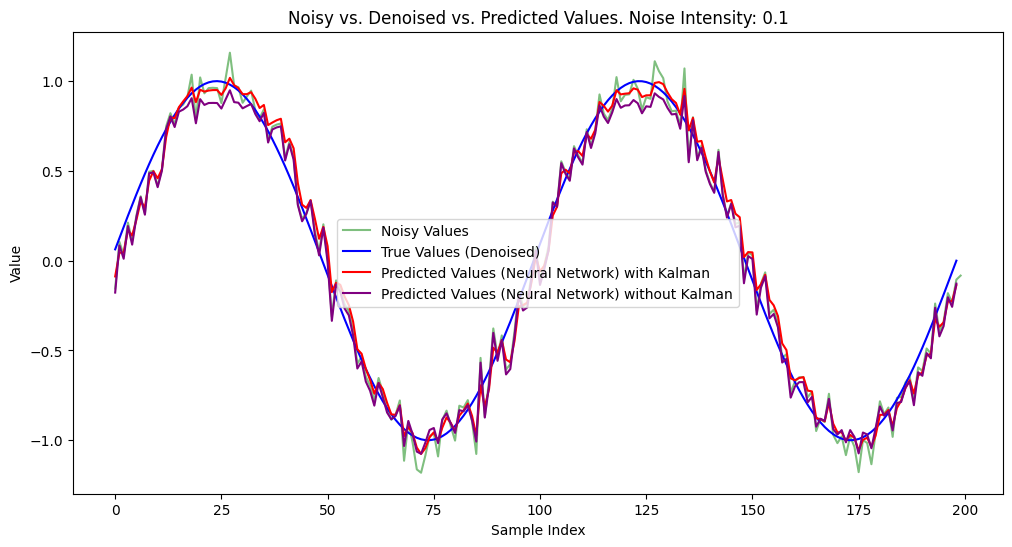

MAE (Predicted with Kalman): 0.0708
MSE (Predicted with Kalman): 0.0084
MAE (Predicted without Kalman): 0.1152
MSE (Predicted without Kalman): 0.0205
7/7 [==============================] - 0s 965us/step


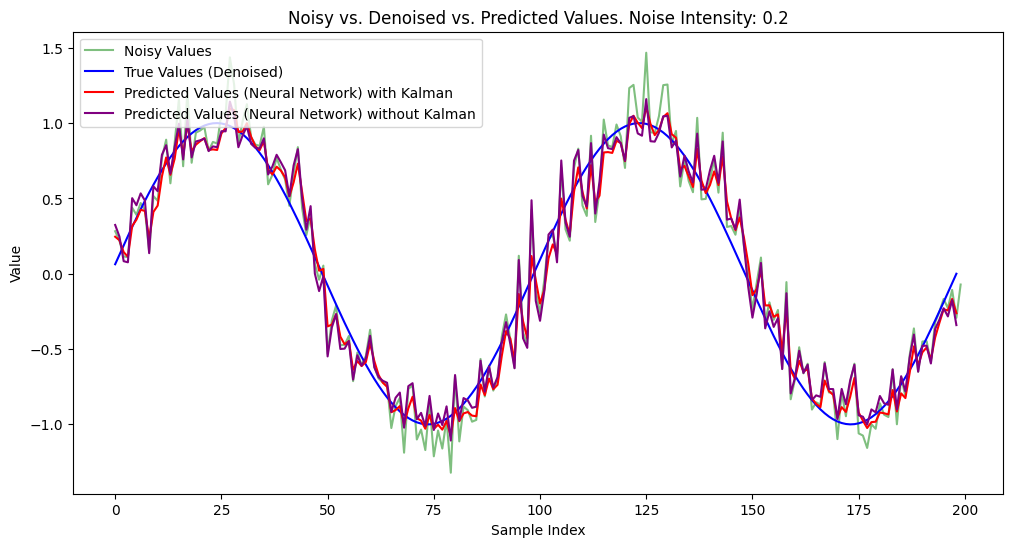

MAE (Predicted with Kalman): 0.1198
MSE (Predicted with Kalman): 0.0232
MAE (Predicted without Kalman): 0.2028
MSE (Predicted without Kalman): 0.0668
7/7 [==============================] - 0s 1ms/step


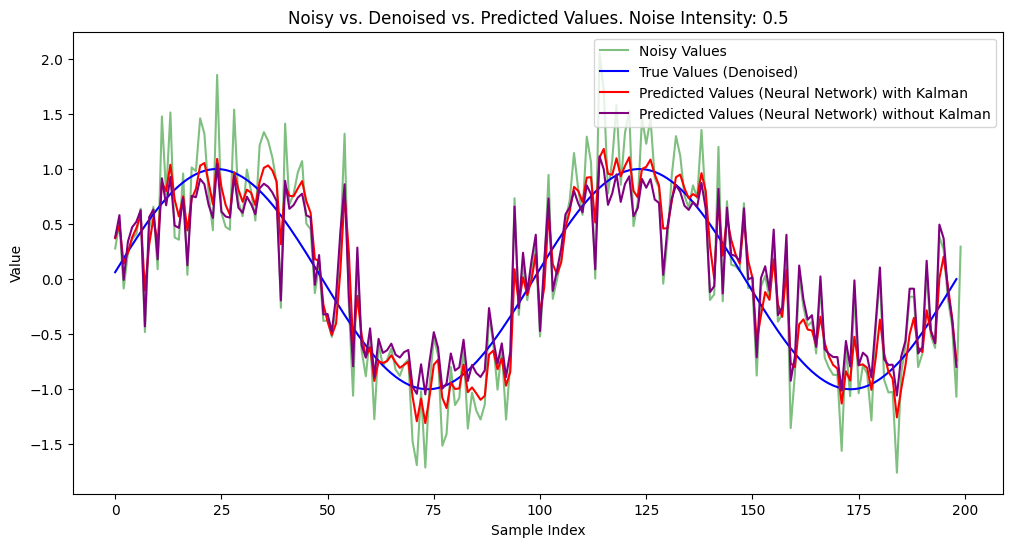

MAE (Predicted with Kalman): 0.2500
MSE (Predicted with Kalman): 0.1008
MAE (Predicted without Kalman): 0.4539
MSE (Predicted without Kalman): 0.3403
7/7 [==============================] - 0s 1ms/step


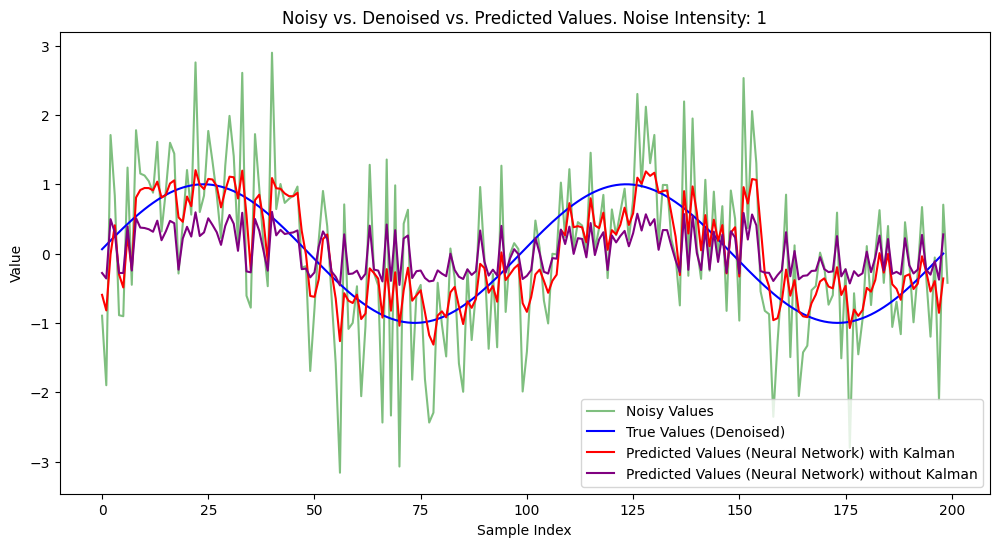

MAE (Predicted with Kalman): 0.3847
MSE (Predicted with Kalman): 0.2411
MAE (Predicted without Kalman): 0.8854
MSE (Predicted without Kalman): 1.2667


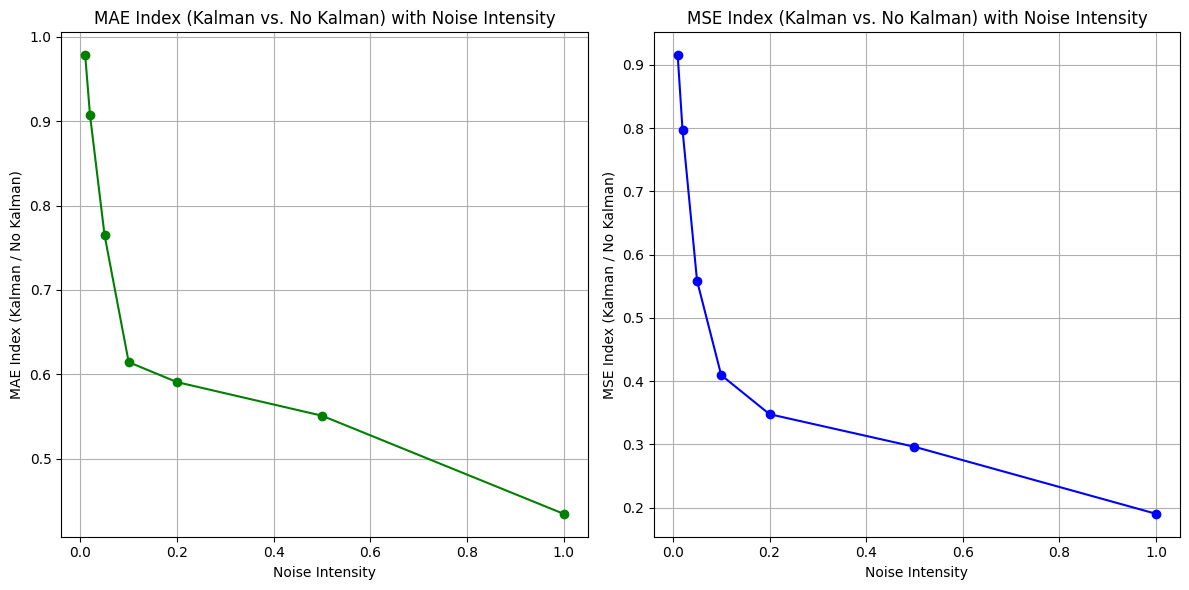

In [43]:
# Generate a noisy sine wave signal
np.random.seed(0)
n_samples = 200
true_values = np.sin(np.linspace(0, 4 * np.pi, n_samples))
mae_indexes = []
mse_indexes = []
noiseIntensity_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
for noiseIntensity in noiseIntensity_values:
    noisy_values = true_values + np.random.normal(0, noiseIntensity, n_samples)

    # Apply Kalman Filter to denoise the signal
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    kf = kf.em(noisy_values, n_iter=5)
    (filtered_state_means, _) = kf.filter(noisy_values)

    # Prepare data for neural network
    X = filtered_state_means[:-1]
    y = filtered_state_means[1:]

    # Build and train neural network
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=100, batch_size=1, verbose=0)

    # Predict using the trained model
    predicted_values = model.predict(X)

    # Prepare data for neural network
    X_n = noisy_values[:-1]
    y_n = noisy_values[1:]

    # Build and train neural network
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_n, y_n, epochs=100, batch_size=1, verbose=0)

    # Predict using the trained model
    predicted_values_n = model.predict(X_n)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(noisy_values, label='Noisy Values', color='green', alpha=0.5)
    plt.plot(true_values[1:], label='True Values (Denoised)', color='blue')
    plt.plot(predicted_values, label='Predicted Values (Neural Network) with Kalman', color='red')
    plt.plot(predicted_values_n, label='Predicted Values (Neural Network) without Kalman', color='purple')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Noisy vs. Denoised vs. Predicted Values. Noise Intensity: {noiseIntensity}')
    plt.legend()
    plt.show()

    # Calculate accuracy for predicted values with Kalman filter
    mae_kalman = mean_absolute_error(filtered_state_means[1:], predicted_values)
    mse_kalman = mean_squared_error(filtered_state_means[1:], predicted_values)

    # Calculate accuracy for predicted values without Kalman filter
    mae_no_kalman = mean_absolute_error(y_n, predicted_values_n)
    mse_no_kalman = mean_squared_error(y_n, predicted_values_n)

    print(f'MAE (Predicted with Kalman): {mae_kalman:.4f}')
    print(f'MSE (Predicted with Kalman): {mse_kalman:.4f}')
    print(f'MAE (Predicted without Kalman): {mae_no_kalman:.4f}')
    print(f'MSE (Predicted without Kalman): {mse_no_kalman:.4f}')

    mae_indexes.append(mae_kalman / mae_no_kalman)
    mse_indexes.append(mse_kalman / mse_no_kalman)

# Plot the MAE indexes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(noiseIntensity_values, mae_indexes, marker='o', color='green')
plt.xlabel('Noise Intensity')
plt.ylabel('MAE Index (Kalman / No Kalman)')
plt.title('MAE Index (Kalman vs. No Kalman) with Noise Intensity')
plt.grid(True)

# Plot the MSE indexes
plt.subplot(1, 2, 2)
plt.plot(noiseIntensity_values, mse_indexes, marker='o', color='blue')
plt.xlabel('Noise Intensity')
plt.ylabel('MSE Index (Kalman / No Kalman)')
plt.title('MSE Index (Kalman vs. No Kalman) with Noise Intensity')
plt.grid(True)

plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 1ms/step


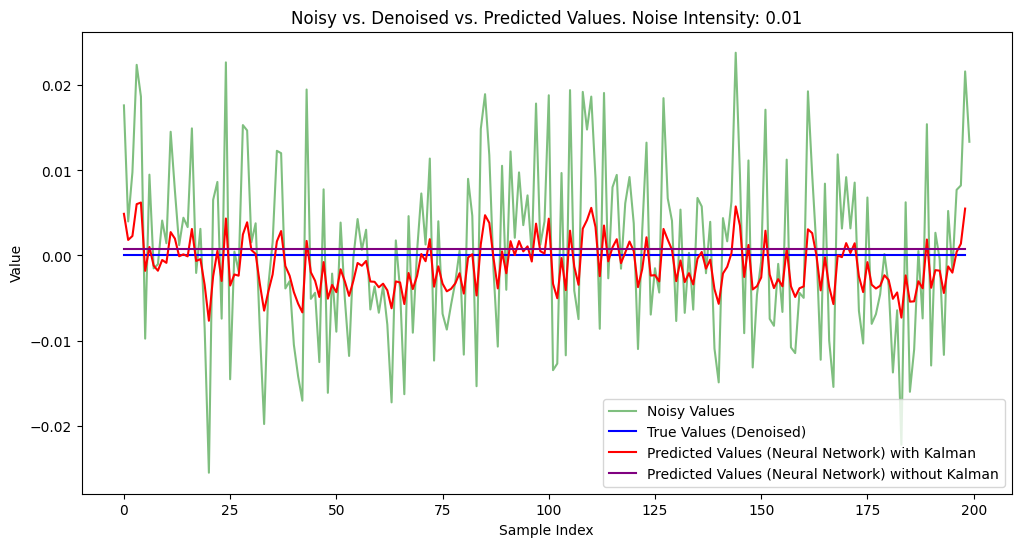

MAE (Predicted with Kalman): 0.0057
MSE (Predicted with Kalman): 0.0000
MAE (Predicted without Kalman): 0.0084
MSE (Predicted without Kalman): 0.0001
7/7 [==============================] - 0s 1ms/step


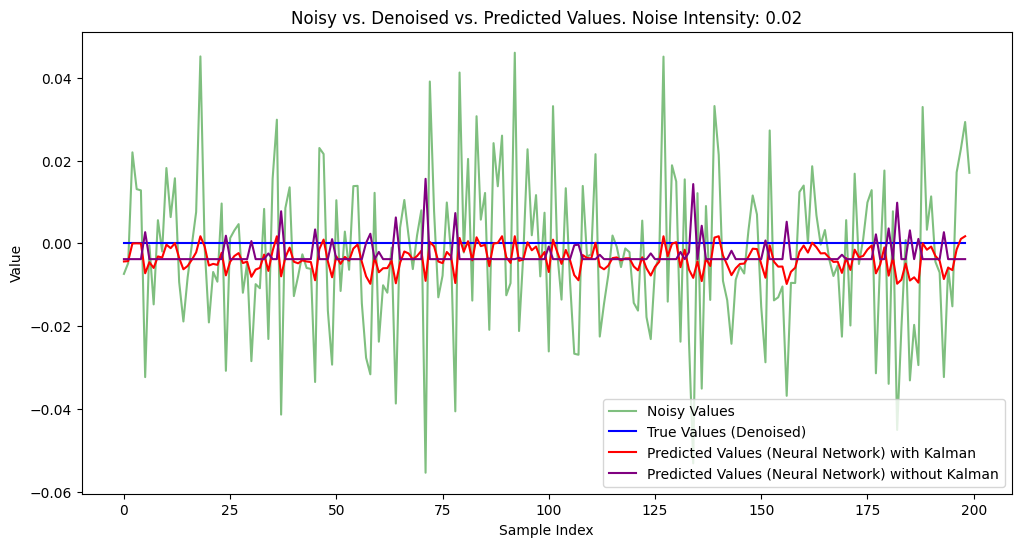

MAE (Predicted with Kalman): 0.0099
MSE (Predicted with Kalman): 0.0002
MAE (Predicted without Kalman): 0.0147
MSE (Predicted without Kalman): 0.0003
7/7 [==============================] - 0s 1ms/step


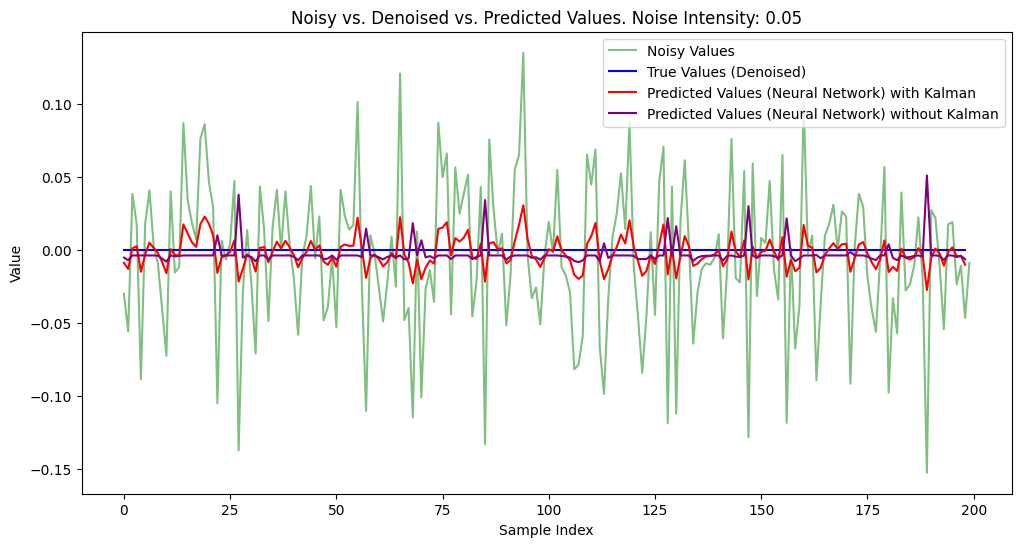

MAE (Predicted with Kalman): 0.0268
MSE (Predicted with Kalman): 0.0012
MAE (Predicted without Kalman): 0.0398
MSE (Predicted without Kalman): 0.0026
7/7 [==============================] - 0s 1ms/step


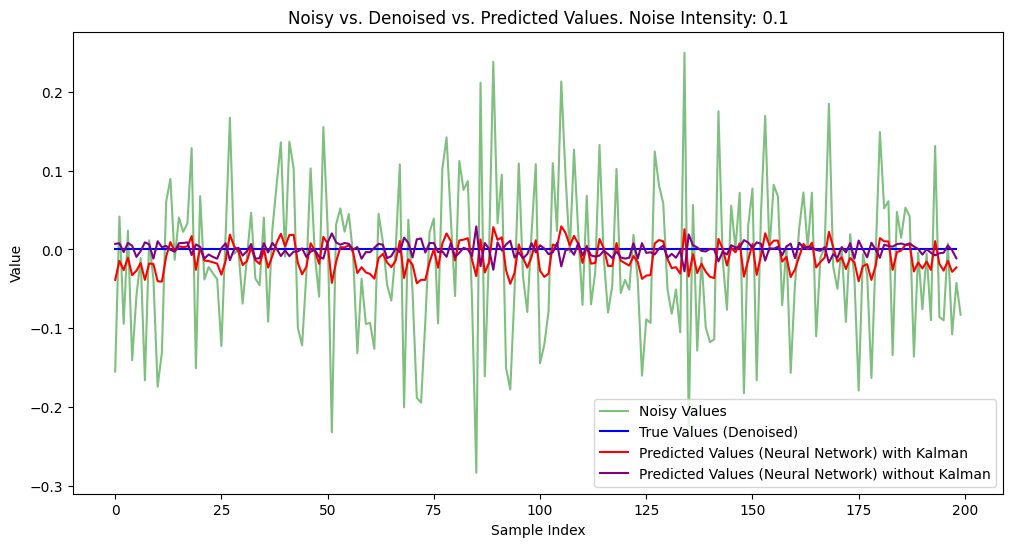

MAE (Predicted with Kalman): 0.0512
MSE (Predicted with Kalman): 0.0040
MAE (Predicted without Kalman): 0.0773
MSE (Predicted without Kalman): 0.0094
7/7 [==============================] - 0s 833us/step


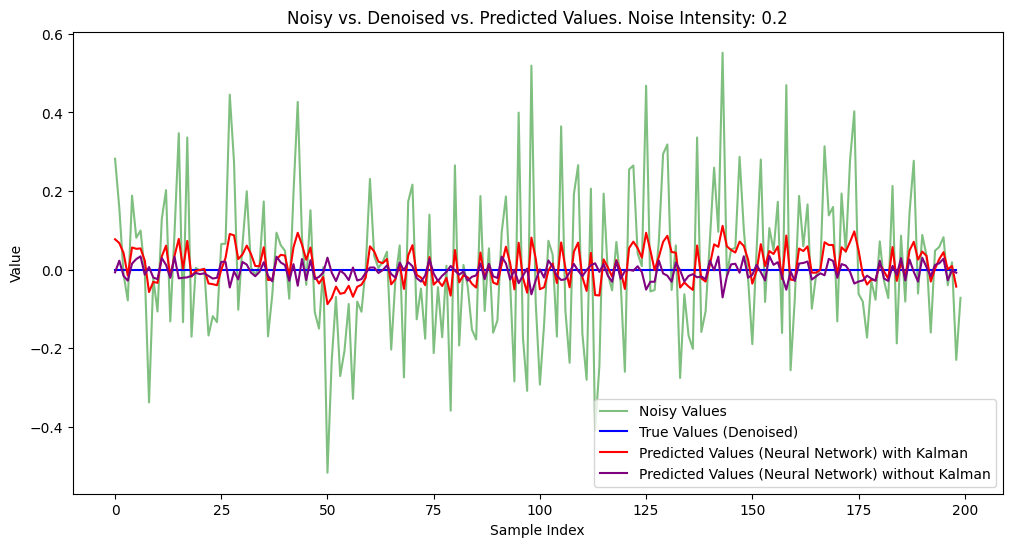

MAE (Predicted with Kalman): 0.0938
MSE (Predicted with Kalman): 0.0142
MAE (Predicted without Kalman): 0.1466
MSE (Predicted without Kalman): 0.0347
7/7 [==============================] - 0s 1ms/step


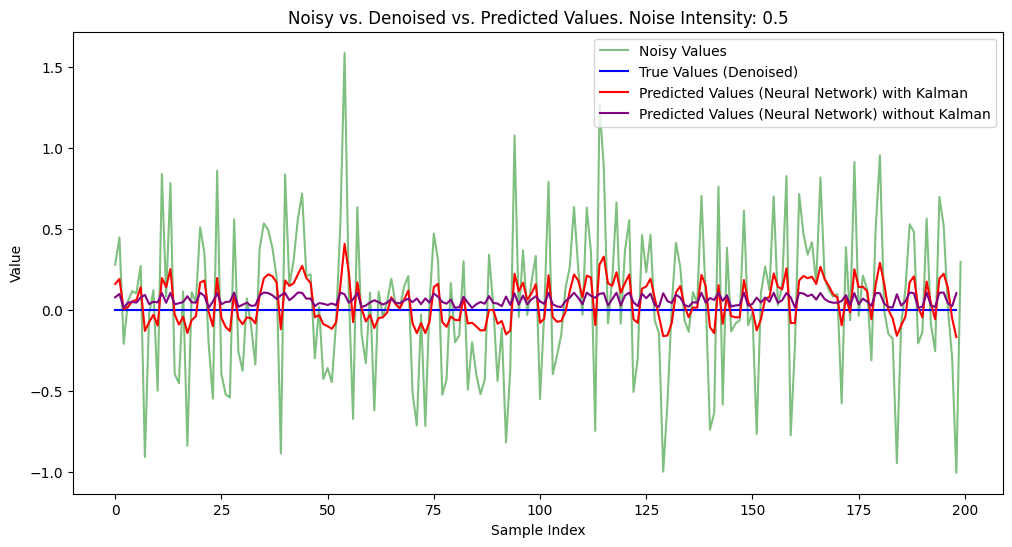

MAE (Predicted with Kalman): 0.2114
MSE (Predicted with Kalman): 0.0725
MAE (Predicted without Kalman): 0.3627
MSE (Predicted without Kalman): 0.2120
7/7 [==============================] - 0s 1ms/step


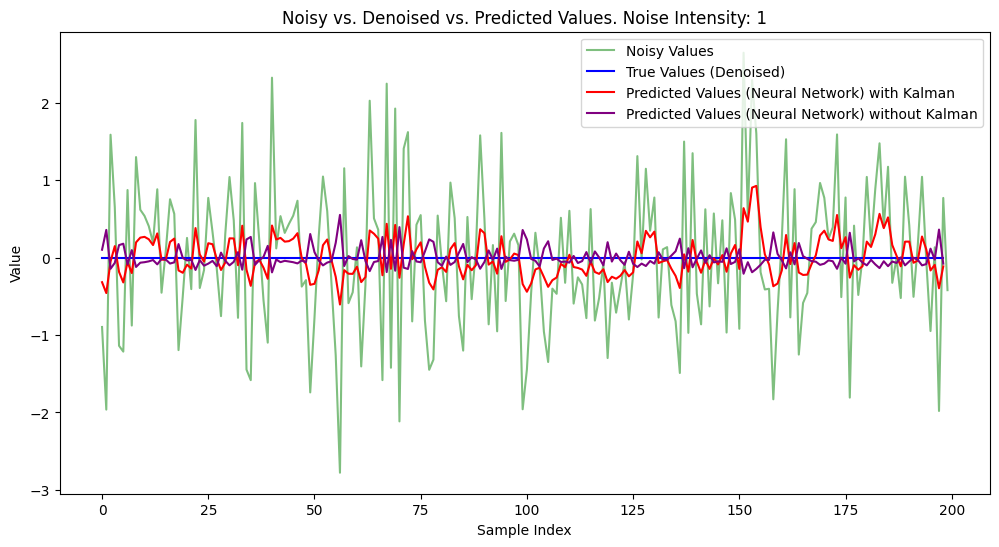

MAE (Predicted with Kalman): 0.3675
MSE (Predicted with Kalman): 0.2037
MAE (Predicted without Kalman): 0.7772
MSE (Predicted without Kalman): 0.9194
7/7 [==============================] - 0s 1ms/step


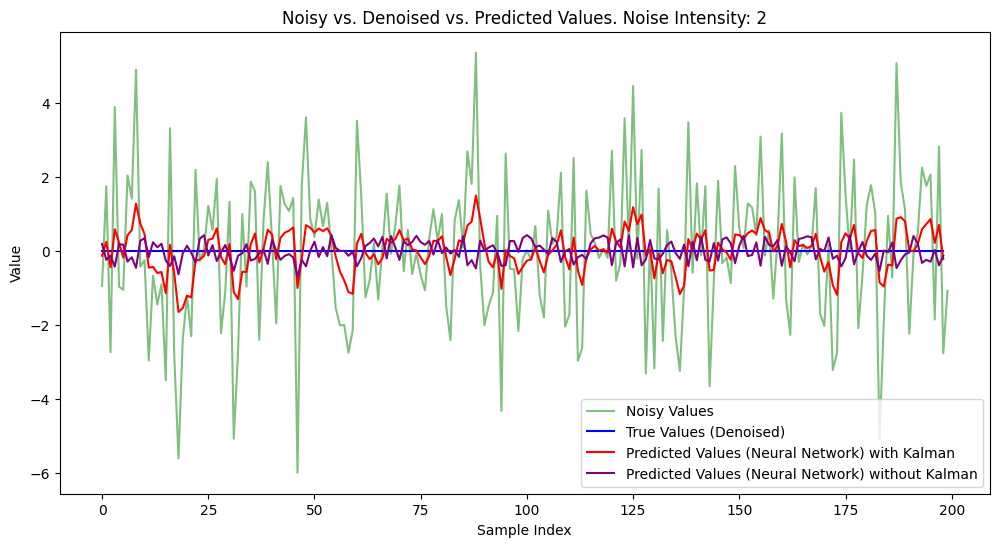

MAE (Predicted with Kalman): 0.6248
MSE (Predicted with Kalman): 0.6362
MAE (Predicted without Kalman): 1.5594
MSE (Predicted without Kalman): 3.9499
7/7 [==============================] - 0s 1ms/step


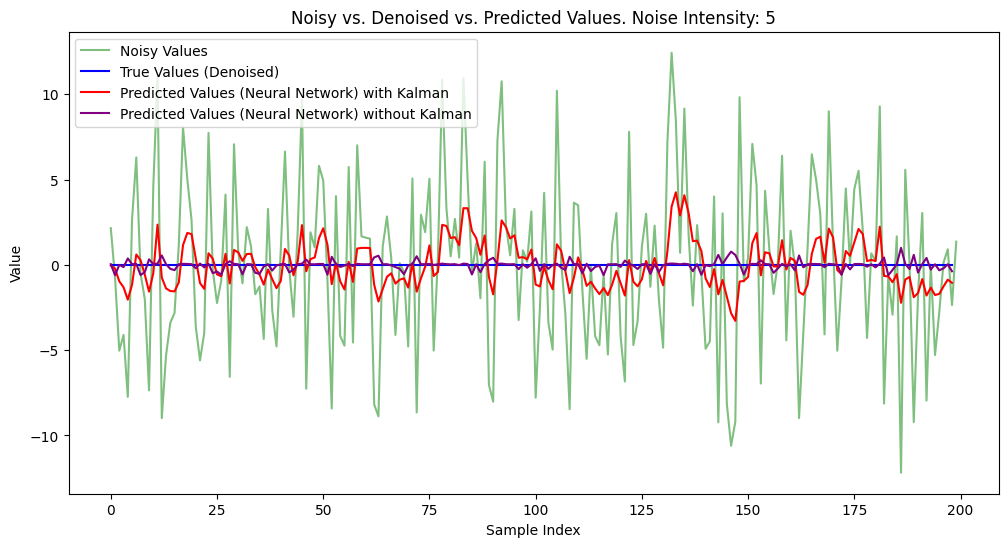

MAE (Predicted with Kalman): 1.3540
MSE (Predicted with Kalman): 2.8959
MAE (Predicted without Kalman): 4.0342
MSE (Predicted without Kalman): 25.3145
7/7 [==============================] - 0s 996us/step


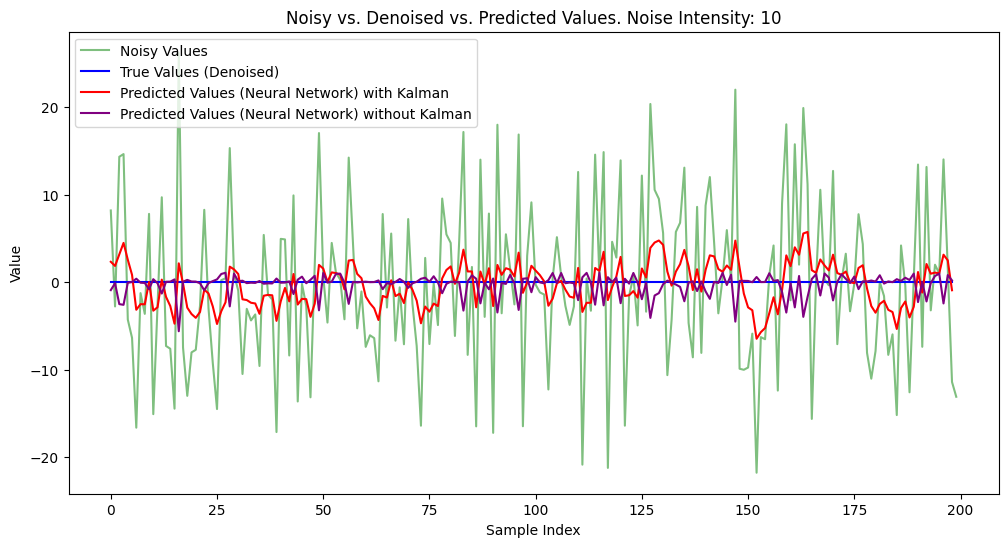

MAE (Predicted with Kalman): 2.3384
MSE (Predicted with Kalman): 8.8915
MAE (Predicted without Kalman): 7.2924
MSE (Predicted without Kalman): 84.6276
7/7 [==============================] - 0s 1ms/step


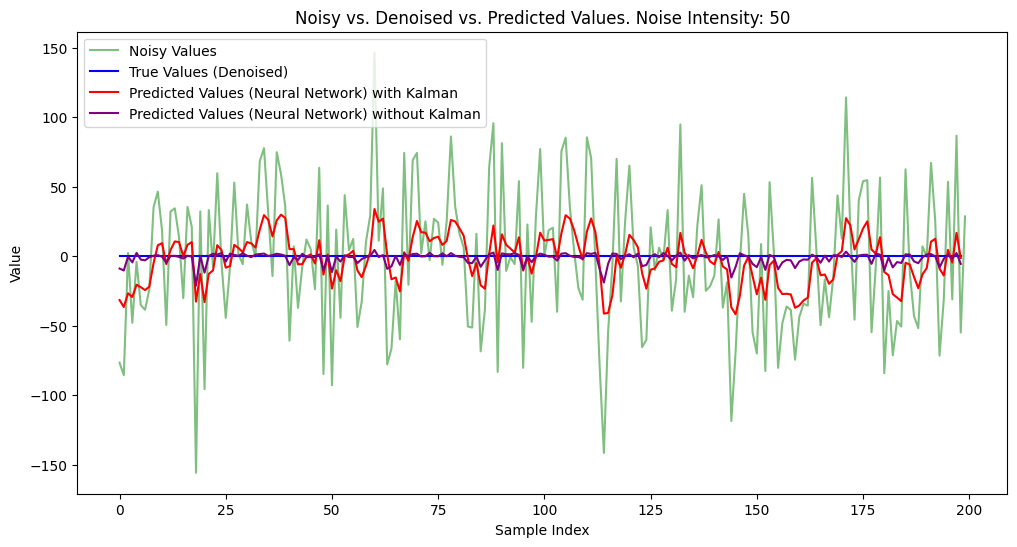

MAE (Predicted with Kalman): 14.0228
MSE (Predicted with Kalman): 302.3327
MAE (Predicted without Kalman): 40.2730
MSE (Predicted without Kalman): 2506.3774
7/7 [==============================] - 0s 1000us/step


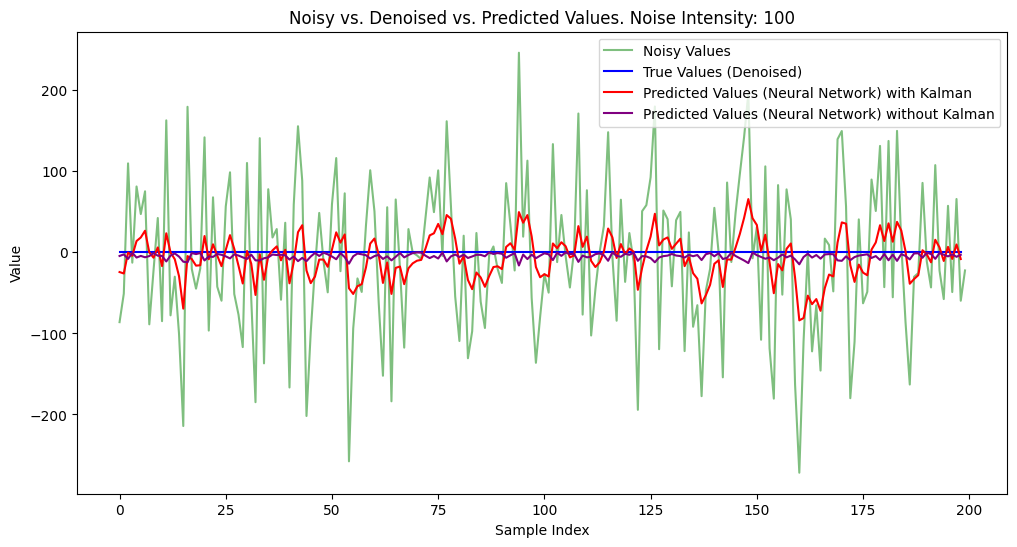

MAE (Predicted with Kalman): 25.9081
MSE (Predicted with Kalman): 1030.2008
MAE (Predicted without Kalman): 75.6776
MSE (Predicted without Kalman): 8827.8947


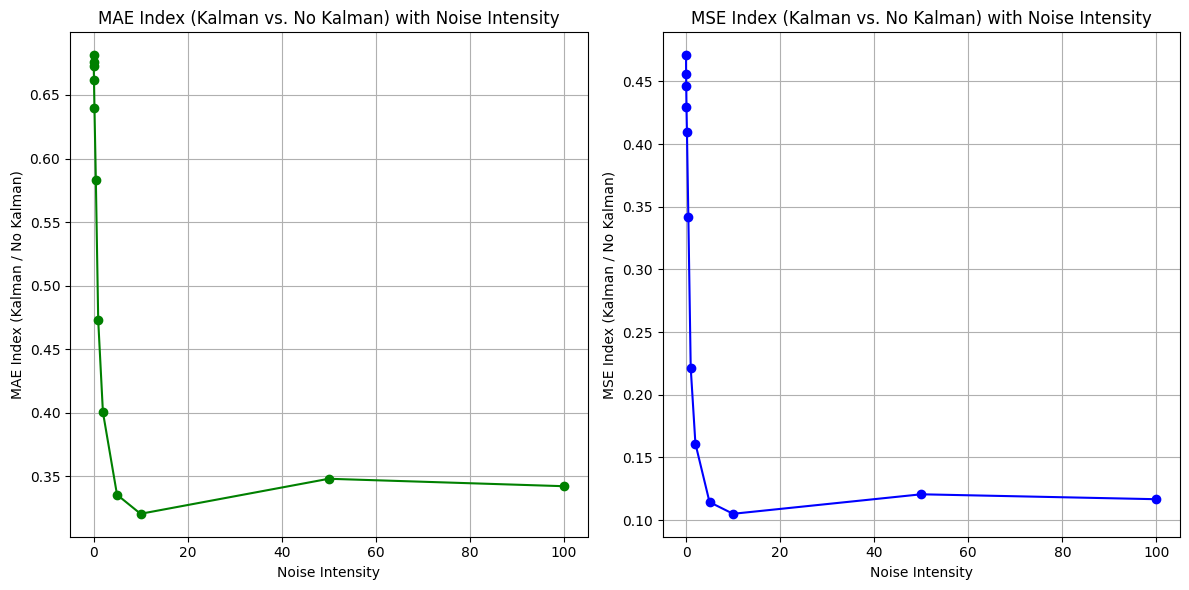

In [47]:
# Generate a noisy sine wave signal
np.random.seed(0)
n_samples = 200
true_values = [0] * n_samples
mae_indexes = []
mse_indexes = []
noiseIntensity_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 50, 100]
for noiseIntensity in noiseIntensity_values:
    noisy_values = true_values + np.random.normal(0, noiseIntensity, n_samples)

    # Apply Kalman Filter to denoise the signal
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    kf = kf.em(noisy_values, n_iter=5)
    (filtered_state_means, _) = kf.filter(noisy_values)

    # Prepare data for neural network
    X = filtered_state_means[:-1]
    y = filtered_state_means[1:]

    # Build and train neural network
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=100, batch_size=1, verbose=0)

    # Predict using the trained model
    predicted_values = model.predict(X)

    # Prepare data for neural network
    X_n = noisy_values[:-1]
    y_n = noisy_values[1:]

    # Build and train neural network
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_n, y_n, epochs=100, batch_size=1, verbose=0)

    # Predict using the trained model
    predicted_values_n = model.predict(X_n)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(noisy_values, label='Noisy Values', color='green', alpha=0.5)
    plt.plot(true_values[1:], label='True Values (Denoised)', color='blue')
    plt.plot(predicted_values, label='Predicted Values (Neural Network) with Kalman', color='red')
    plt.plot(predicted_values_n, label='Predicted Values (Neural Network) without Kalman', color='purple')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Noisy vs. Denoised vs. Predicted Values. Noise Intensity: {noiseIntensity}')
    plt.legend()
    plt.show()

    # Calculate accuracy for predicted values with Kalman filter
    mae_kalman = mean_absolute_error(filtered_state_means[1:], predicted_values)
    mse_kalman = mean_squared_error(filtered_state_means[1:], predicted_values)

    # Calculate accuracy for predicted values without Kalman filter
    mae_no_kalman = mean_absolute_error(y_n, predicted_values_n)
    mse_no_kalman = mean_squared_error(y_n, predicted_values_n)

    print(f'MAE (Predicted with Kalman): {mae_kalman:.4f}')
    print(f'MSE (Predicted with Kalman): {mse_kalman:.4f}')
    print(f'MAE (Predicted without Kalman): {mae_no_kalman:.4f}')
    print(f'MSE (Predicted without Kalman): {mse_no_kalman:.4f}')

    mae_indexes.append(mae_kalman / mae_no_kalman)
    mse_indexes.append(mse_kalman / mse_no_kalman)

# Plot the MAE indexes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(noiseIntensity_values, mae_indexes, marker='o', color='green')
plt.xlabel('Noise Intensity')
plt.ylabel('MAE Index (Kalman / No Kalman)')
plt.title('MAE Index (Kalman vs. No Kalman) with Noise Intensity')
plt.grid(True)

# Plot the MSE indexes
plt.subplot(1, 2, 2)
plt.plot(noiseIntensity_values, mse_indexes, marker='o', color='blue')
plt.xlabel('Noise Intensity')
plt.ylabel('MSE Index (Kalman / No Kalman)')
plt.title('MSE Index (Kalman vs. No Kalman) with Noise Intensity')
plt.grid(True)

plt.tight_layout()
plt.show()

In [65]:
import requests
import os

# Define the file name and URL
file_name = "ETH-USD.csv"
url = "https://github.com/maurotommasi/Datasets/raw/main/Financial/Crypto/Global%20Crypto%20Currency%20Price%20Database/data/ETH-USD.csv"

# Check if the file already exists
if os.path.exists(file_name):
    print("File already exists. Skipping download.")
else:
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful (HTTP status code 200)
    if response.status_code == 200:
        # Get the content of the response and save it to a file
        with open(file_name, "wb") as f:
            f.write(response.content)
        print("File downloaded successfully.")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")



File downloaded successfully.


In [67]:
data = pd.read_csv(file_name)
data.head()

,Name,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,Ethereum USD,ETH-USD,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,Ethereum USD,ETH-USD,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,Ethereum USD,ETH-USD,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,Ethereum USD,ETH-USD,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,Ethereum USD,ETH-USD,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [68]:
values = data['Open'].values

In [63]:
# Apply Kalman Filter to denoise the signal
def showPredictionKalman(values):
    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    kf = kf.em(values, n_iter=5)
    (filtered_state_means, _) = kf.filter(values)

    # Prepare data for neural network
    X = filtered_state_means[:-1]
    y = filtered_state_means[1:]

    # Build and train neural network
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=100, batch_size=1, verbose=0)

    # Predict using the trained model
    predicted_values = model.predict(X)

    # Prepare data for neural network
    X_n = values[:-1]
    y_n = values[1:]

    # Build and train neural network
    model_n = Sequential()
    model_n.add(Dense(10, input_dim=1, activation='relu'))
    model_n.add(Dense(1))
    model_n.compile(loss='mean_squared_error', optimizer='adam')
    model_n.fit(X_n, y_n, epochs=100, batch_size=1, verbose=0)

    # Predict using the trained model
    predicted_values_n = model_n.predict(X_n)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(values[1:], label='Values', color='blue')
    plt.plot(predicted_values, label='Predicted Values (Neural Network) with Kalman', color='red')
    plt.plot(predicted_values_n, label='Predicted Values (Neural Network) without Kalman', color='purple')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Noisy vs. Denoised vs. Predicted Values')
    plt.legend()
    plt.show()

    # Calculate accuracy for predicted values with Kalman filter
    mae_kalman = mean_absolute_error(filtered_state_means[1:], predicted_values)
    mse_kalman = mean_squared_error(filtered_state_means[1:], predicted_values)

    # Calculate accuracy for predicted values without Kalman filter
    mae_no_kalman = mean_absolute_error(y_n, predicted_values_n)
    mse_no_kalman = mean_squared_error(y_n, predicted_values_n)

    print(f'MAE (Predicted with Kalman): {mae_kalman:.4f}')
    print(f'MSE (Predicted with Kalman): {mse_kalman:.4f}')
    print(f'MAE (Predicted without Kalman): {mae_no_kalman:.4f}')
    print(f'MSE (Predicted without Kalman): {mse_no_kalman:.4f}')

    return model, model_n

68/68 [==============================] - 0s 855us/step


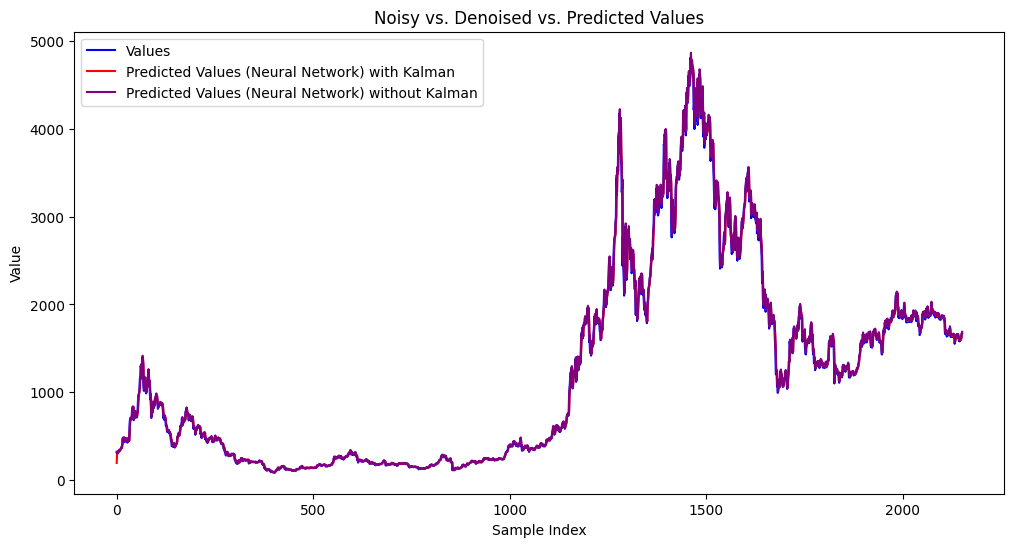

MAE (Predicted with Kalman): 32.4301
MSE (Predicted with Kalman): 3730.6456
MAE (Predicted without Kalman): 42.4742
MSE (Predicted without Kalman): 6222.5236


In [71]:
modelOpen, modelOpen_n = showPredictionKalman(data['Open'].values)

In [72]:
# Function to predict the next value using the Kalman-filtered model
def predict_next_value_with_kalman(filtered_state_means, kalman_model):
    last_observed_value = filtered_state_means[-1]  # Get the last observed value
    predicted_next_value = kalman_model.predict(last_observed_value.reshape(1, 1))[0, 0]
    return predicted_next_value

# Function to predict the next value using the model without Kalman filtering
def predict_next_value_without_kalman(values, non_kalman_model):
    last_observed_value = values[-1]  # Get the last observed value
    predicted_next_value = non_kalman_model.predict(last_observed_value.reshape(1, 1))[0, 0]
    return predicted_next_value

# Example usage:
# Assuming filtered_state_means is the output of Kalman filtering and models are trained

# Predict next value using the Kalman-filtered model
predicted_next_value_kalman = predict_next_value_with_kalman(filtered_state_means, modelOpen)

# Predict next value using the model without Kalman filtering
predicted_next_value_no_kalman = predict_next_value_without_kalman(values, modelOpen_n)

print(f'Predicted next value with Kalman: {predicted_next_value_kalman:.4f}')
print(f'Predicted next value without Kalman: {predicted_next_value_no_kalman:.4f}')


1/1 [==============================] - 0s 34ms/step
Predicted next value with Kalman: 1679.9470
Predicted next value without Kalman: 1692.3096
